In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannot.statannot import add_statistical_test_annotation

sns.set(style="whitegrid")
df = sns.load_dataset("tips")

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+09
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: MWW RankSum P_val=6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: MWW RankSum P_val=4.690e-02 U_stat=2.180e+03
Fri v.s. Sun: MWW RankSum P_val=2.680e-02 U_stat=4.835e+02


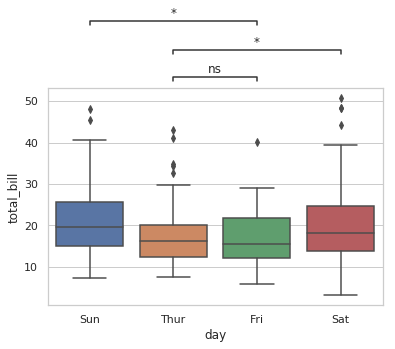

In [154]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    boxPairList=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=2)
plt.savefig('example1.png', dpi=300, bbox_inches='tight')

Thur_No v.s. Fri_No: t-test independent samples, P_val=7.425e-01 stat=-3.305e-01
Sat_Yes v.s. Sat_No: t-test independent samples, P_val=4.304e-01 stat=7.922e-01
Sun_No v.s. Thur_Yes: t-test independent samples, P_val=5.623e-01 stat=5.822e-01


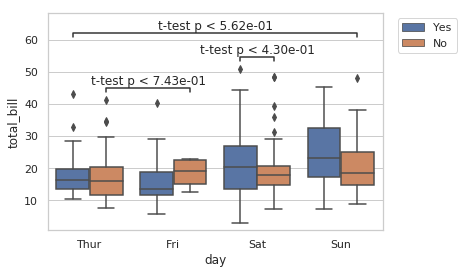

In [155]:
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    boxPairList=[(("Thur", "No"), ("Fri", "No")),
                                 (("Sat", "Yes"), ("Sat", "No")),
                                 (("Sun", "No"), ("Thur", "Yes"))
                                ],
                    test='t-test', textFormat='full', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example2.png', dpi=300, bbox_inches='tight')